In [6]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [7]:
!pip install missingno

In [8]:
#IMPORT LIBRARIES
import pandas as pd #Data Preprocessing
import matplotlib.pyplot as plt #Data Visualisation
import seaborn as sns #Data Visualisation
import missingno as msno #Missingno Data-Data Visualisation
from collections import Counter #Counting
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data = pd.read_csv(r"/content/drive/MyDrive/Customer-Churn.csv")

In [11]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
#Print the Top Row
data.head(10) #Calls-up Result for Top 5 Rows by default

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [13]:
data.tail(10) #print the Bottom 10 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [14]:
#Dimensionality of the Data-Exploring the shape (number of rows & columns)
data.shape

(7043, 21)

In [15]:
#To Examine the columns/Features of the data
data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
#Investigate the dataset for annomalies and dat types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
 #Numerical statistical Analysis (DESCRIPTIVE STATISTICS)
data.describe().T #This explores only the numerical features/columns

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [18]:
#Categorical statistical Analysis
data.describe(include=["object","bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [19]:
#Categorical statistical Analysis
data.describe(include=["object","bool"]).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [20]:
#Ivestigate the missing values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

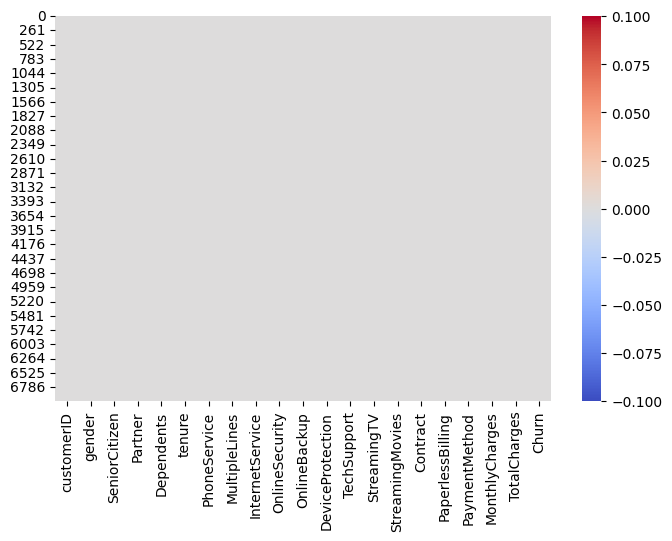

In [21]:
#To visualize the Missing Data
plt.figure(figsize = (8,5))
sns.heatmap(data.isna() , cbar = True, cmap = "coolwarm" )
plt.show()

In [22]:
#COMMENT: The result above confirms there are No Missing Values in the Data

In [23]:
#filtering out categorical  columns
categorical_cols = data.select_dtypes(include=["object"])

In [24]:
categorical_cols

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [25]:
numerical_cols = data.select_dtypes(include=["number"])

In [26]:
categorical_cols

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [27]:
#convert churn to a numerical data using the mapping technique
map_values={"Yes":1, "No":0}

In [28]:
data['Churn'] = categorical_cols['Churn'].map(map_values)
numerical_cols['Churn'] = categorical_cols['Churn'].map(map_values)

In [29]:
numerical_cols

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1
...,...,...,...,...
7038,0,24,84.80,0
7039,0,72,103.20,0
7040,0,11,29.60,0
7041,1,4,74.40,1


<Axes: xlabel='Partner', ylabel='Churn'>

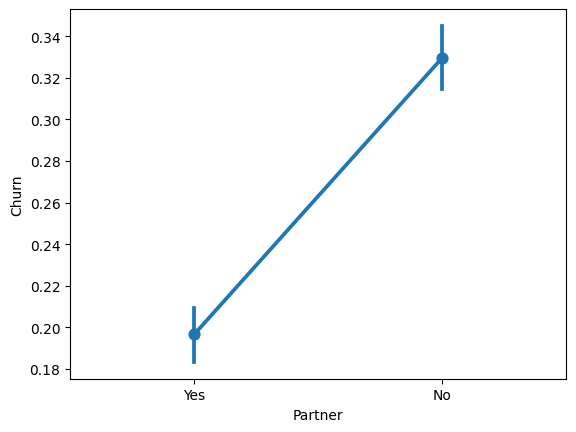

In [30]:
sns.pointplot(data=data, x='Partner', y='Churn')

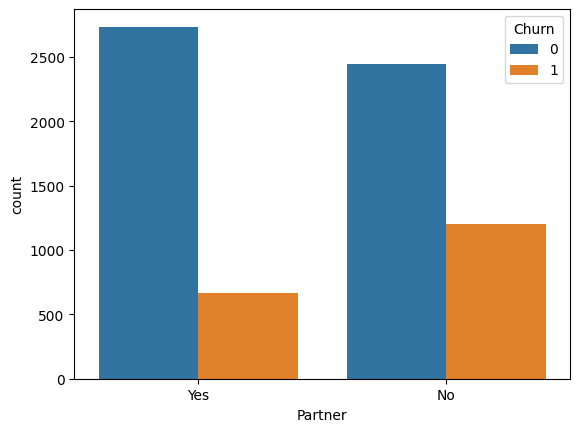

In [31]:
#categorical EDA
#Univariate
sns.countplot(data=data, x='Partner', hue = 'Churn');

In [32]:
#Bivariate analysis on categorical columns

def perform_categorical_eda(col, hue_y, data_1=data, categorical_cols = categorical_cols):
    fig, axs = plt.subplots(nrows=1, ncols = 2, figsize =(12,6))
    sns.countplot(data=categorical_cols, x = col, hue =hue_y, ax=axs[0])
    sns.pointplot(x = col, y = hue_y, data = data_1, ax=axs[1]);

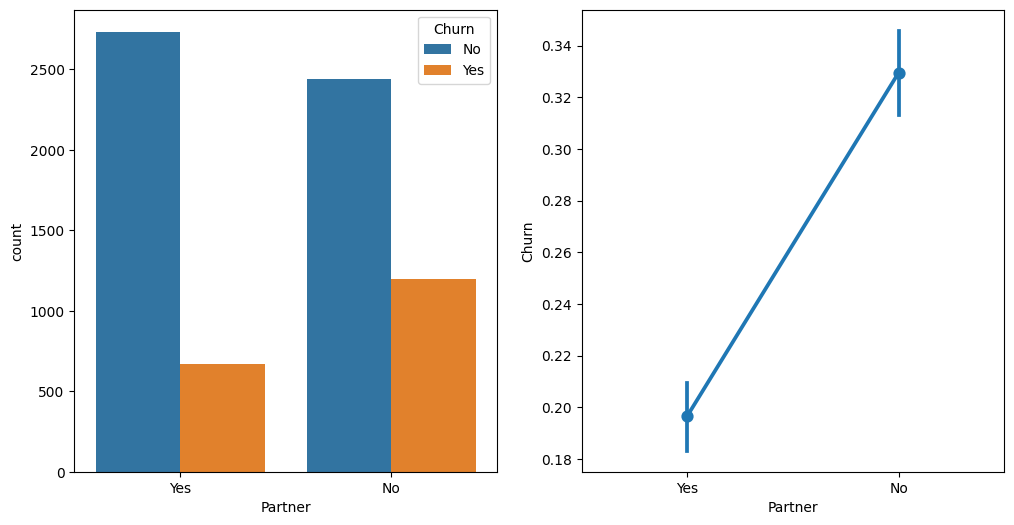

In [33]:
perform_categorical_eda("Partner", hue_y = "Churn")

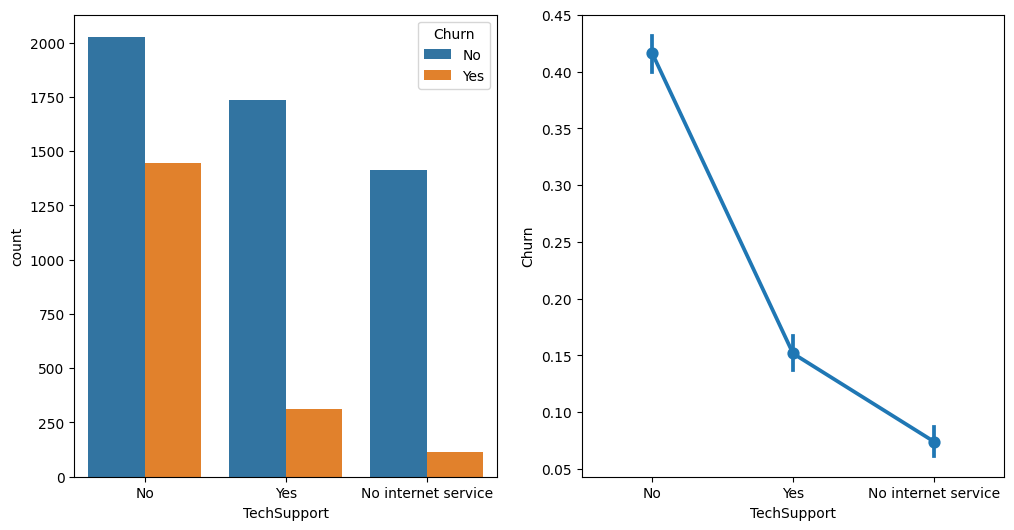

In [34]:
perform_categorical_eda("TechSupport", hue_y = "Churn")

#customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

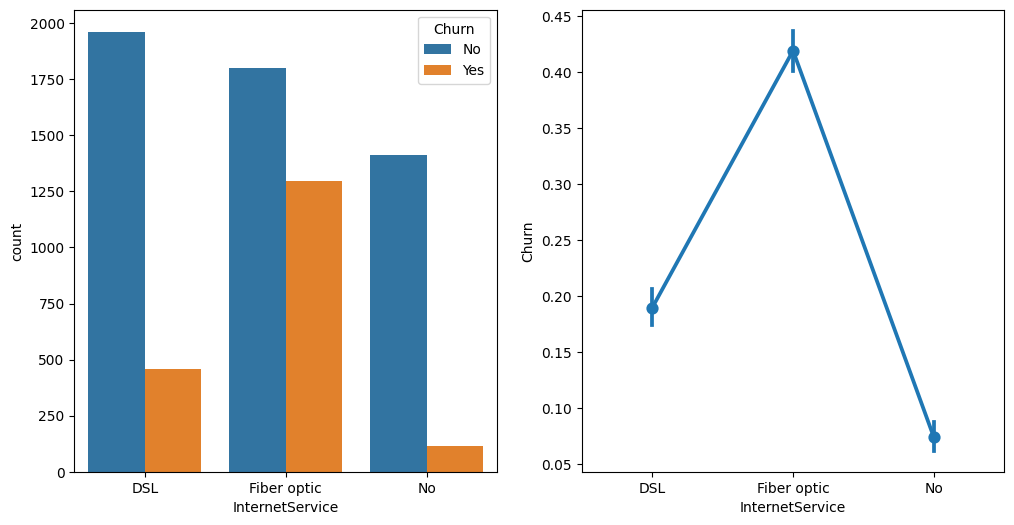

In [35]:
perform_categorical_eda('InternetService', hue_y = "Churn")

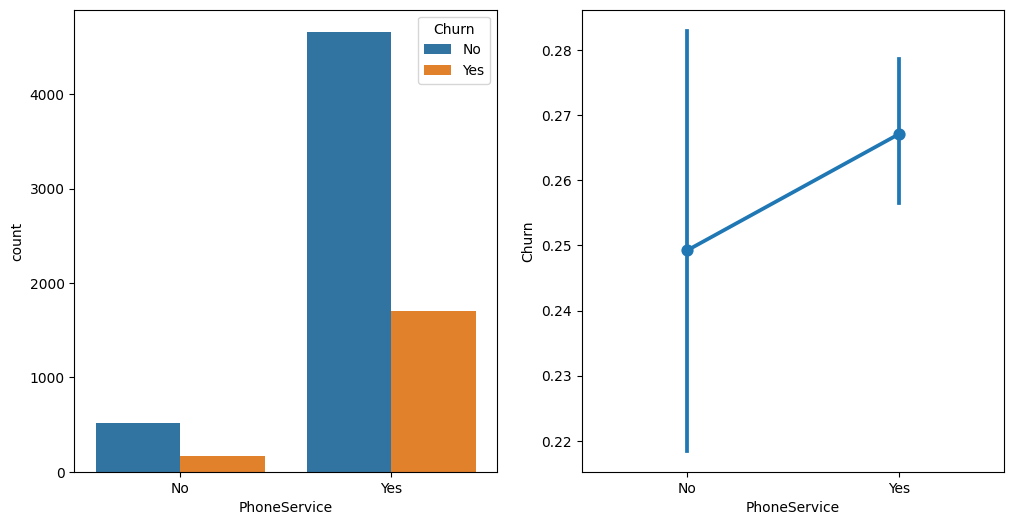

In [36]:
perform_categorical_eda('PhoneService', hue_y = "Churn")

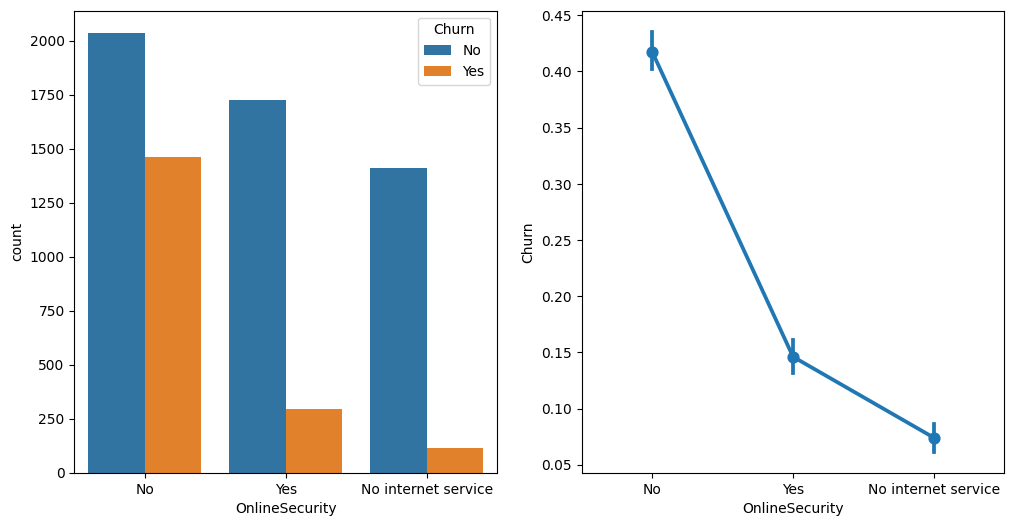

In [37]:
perform_categorical_eda( 'OnlineSecurity', hue_y = "Churn")

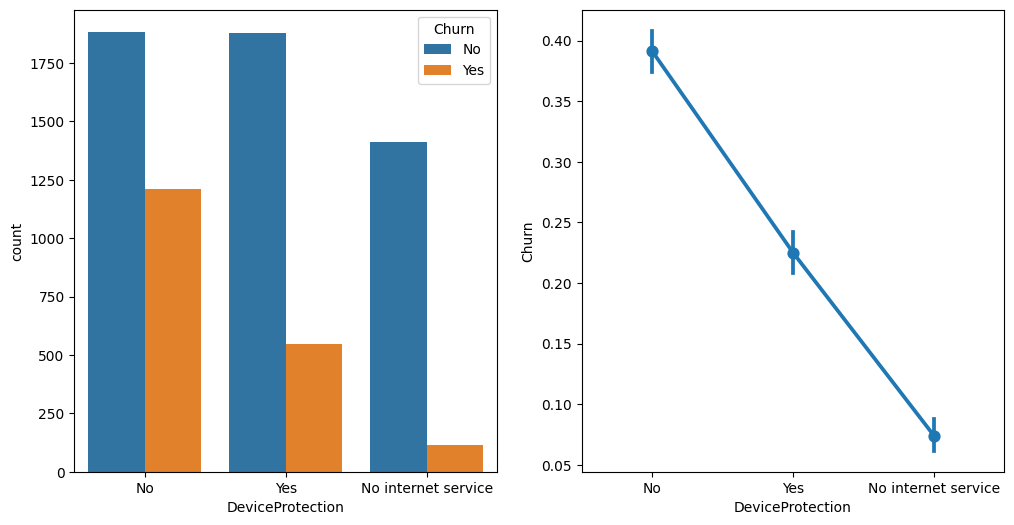

In [38]:
perform_categorical_eda( 'DeviceProtection', hue_y = "Churn")

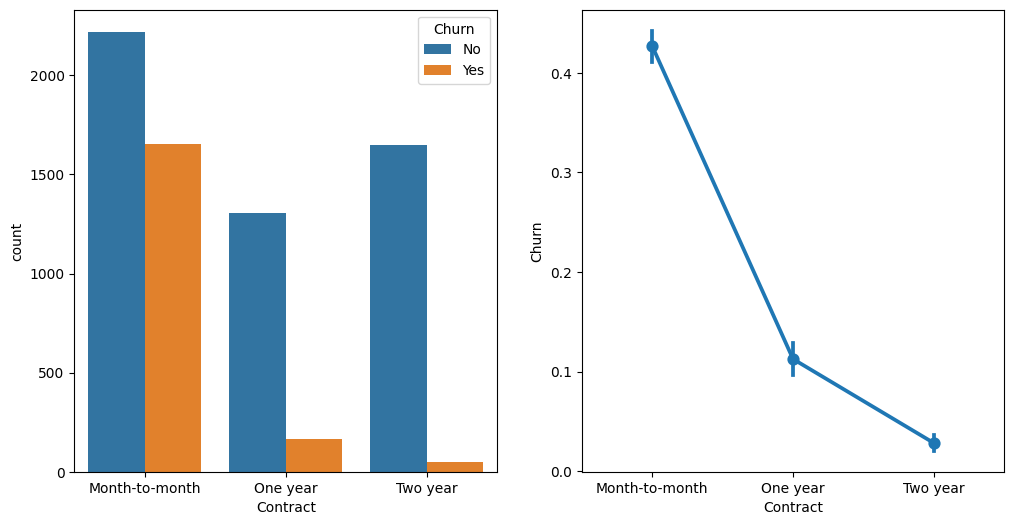

In [39]:
perform_categorical_eda('Contract' , hue_y = "Churn")

In [40]:
# numerical EDA
numerical_cols.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
Churn               int64
dtype: object

In [41]:
#Exploring Correlations
#checking for correlation matrix
corr_matrix=data.corr(numeric_only=True)

In [42]:
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.150889
tenure,0.016567,1.000000,0.247900,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.193356
Churn,0.150889,-0.352229,0.193356,1.000000


From the correlation Matrix above:

1. Churn has a weak-positive r/ship with SeniorCitizen, MonthlyCharges and a strong-negative r/ship with tenure.

2. Tenure has a weak positive r/ship with SeniorCotizen, MonthlyCharges and strong-negative r/ship with churn.

3. MonthlyCharges has a weak-positive r/ship with senior citizen, tenure and churn.

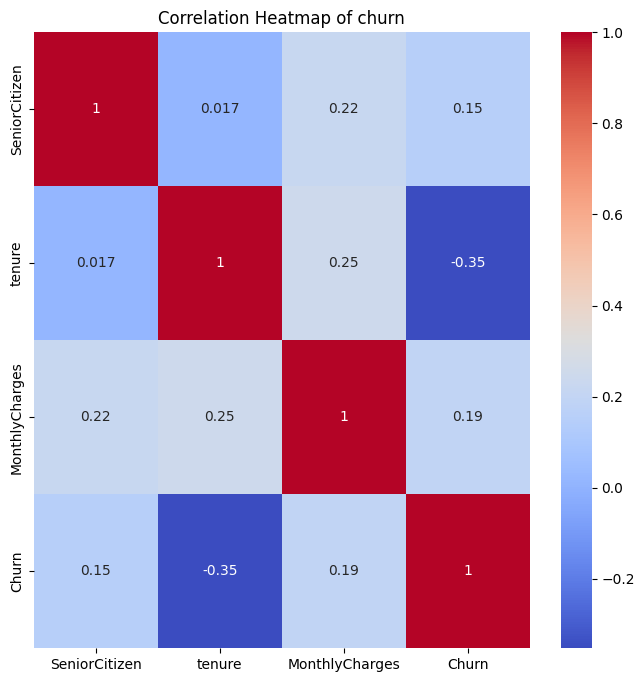

In [43]:
#Correlation Heatmap visualization
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix, cmap= 'coolwarm', annot = True)
plt.title('Correlation Heatmap of churn');

In [44]:
# UNIVARIATE ANALYISIS:
# NUMERICAL COLUMNS/FEATURES =NUMERICAL VISUALIZATION TECHNIQUES
# CATEGORICAL COLUMNS/FEATURES =CATEGORICAL VISUALIZATION TECHNIQUES
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

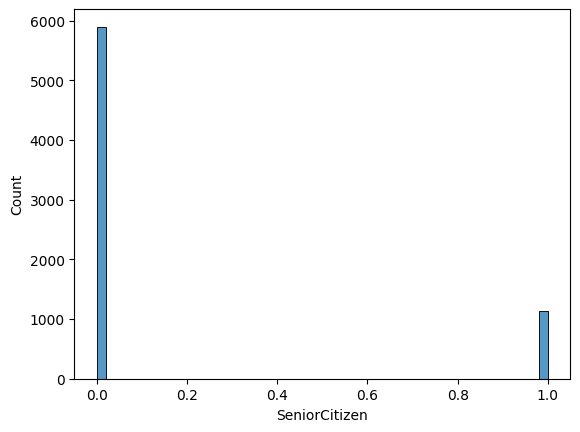

In [45]:
#Bivariate anlysis on Numerical data
# observing the distribution on numerical columns (mean,type of distribution and outliers)
sns.histplot(data['SeniorCitizen'], bins = 50);

<Axes: xlabel='Churn', ylabel='SeniorCitizen'>

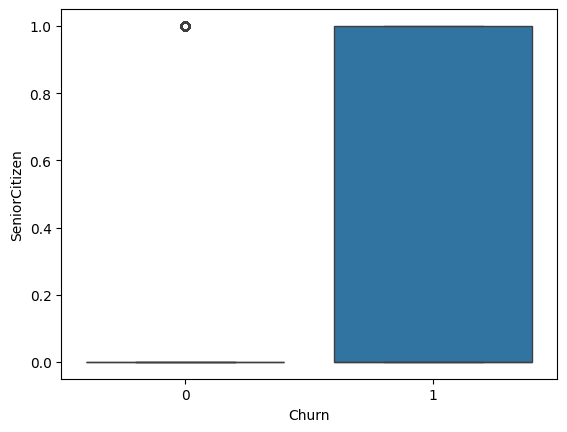

In [46]:
sns.boxplot(x='Churn' , y='SeniorCitizen', data=data )

In [47]:
def perform_numerical_eda(col, hue_y = 'Churn', data = data):
    fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(12,6))
    #hisplot
    sns.histplot(x=col, bins =50, data=data, ax=axs[0])
    axs[0].set_title(f'Distribution of {col}')
    #Boxplot
    sns.boxplot(x=hue_y, y=col, data=data, ax=axs[1])
    axs[1].set_title(f'Boxplot of Churn with {col}')
    plt.tight_layout();


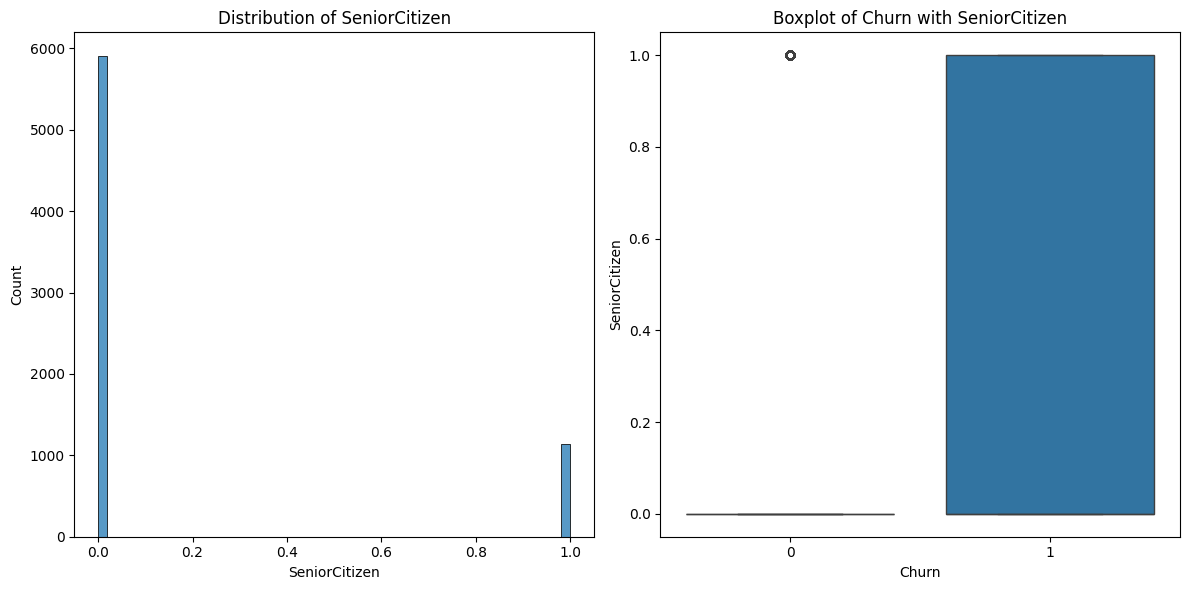

In [48]:
perform_numerical_eda('SeniorCitizen')

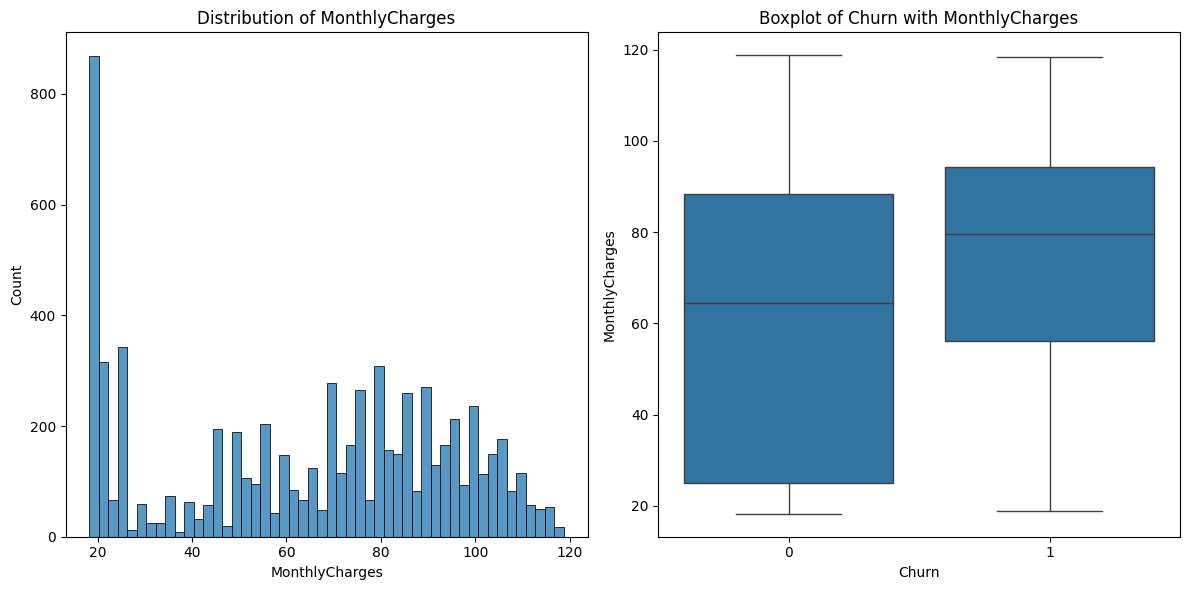

In [49]:
perform_numerical_eda('MonthlyCharges')

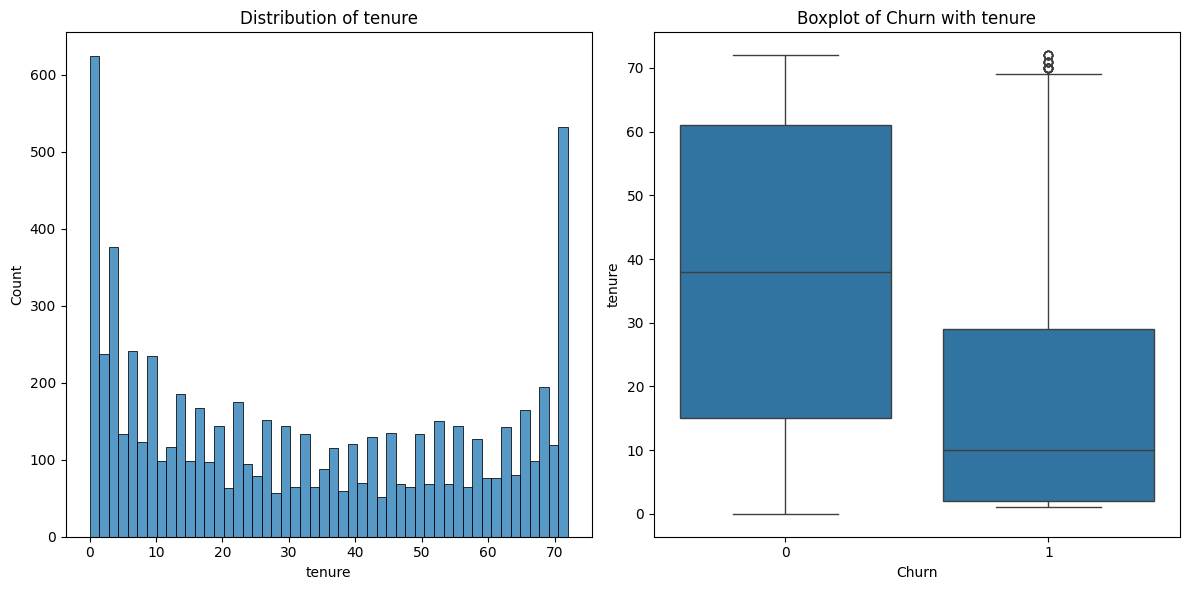

In [50]:
perform_numerical_eda('tenure')

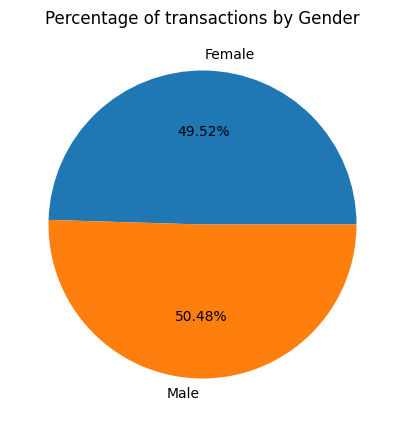

In [51]:
fig,ax=plt.subplots(figsize=(5,5))
count=Counter(data["gender"])
ax.pie(count.values(),labels=count.keys(),autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Gender")
plt.show();

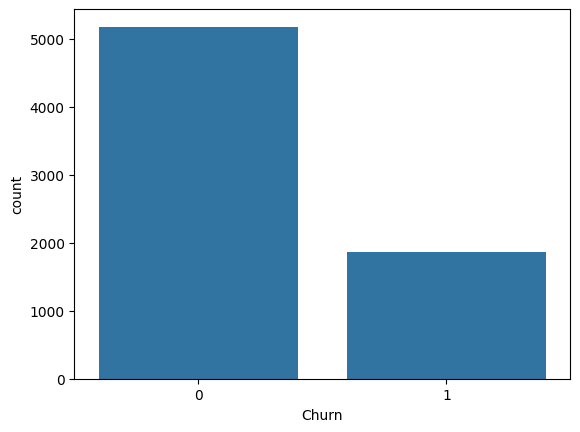

In [52]:
# HOW MANY Churn BELONG TO EACH Churn SPEC
sns.countplot(x="Churn", data=data);

In [53]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

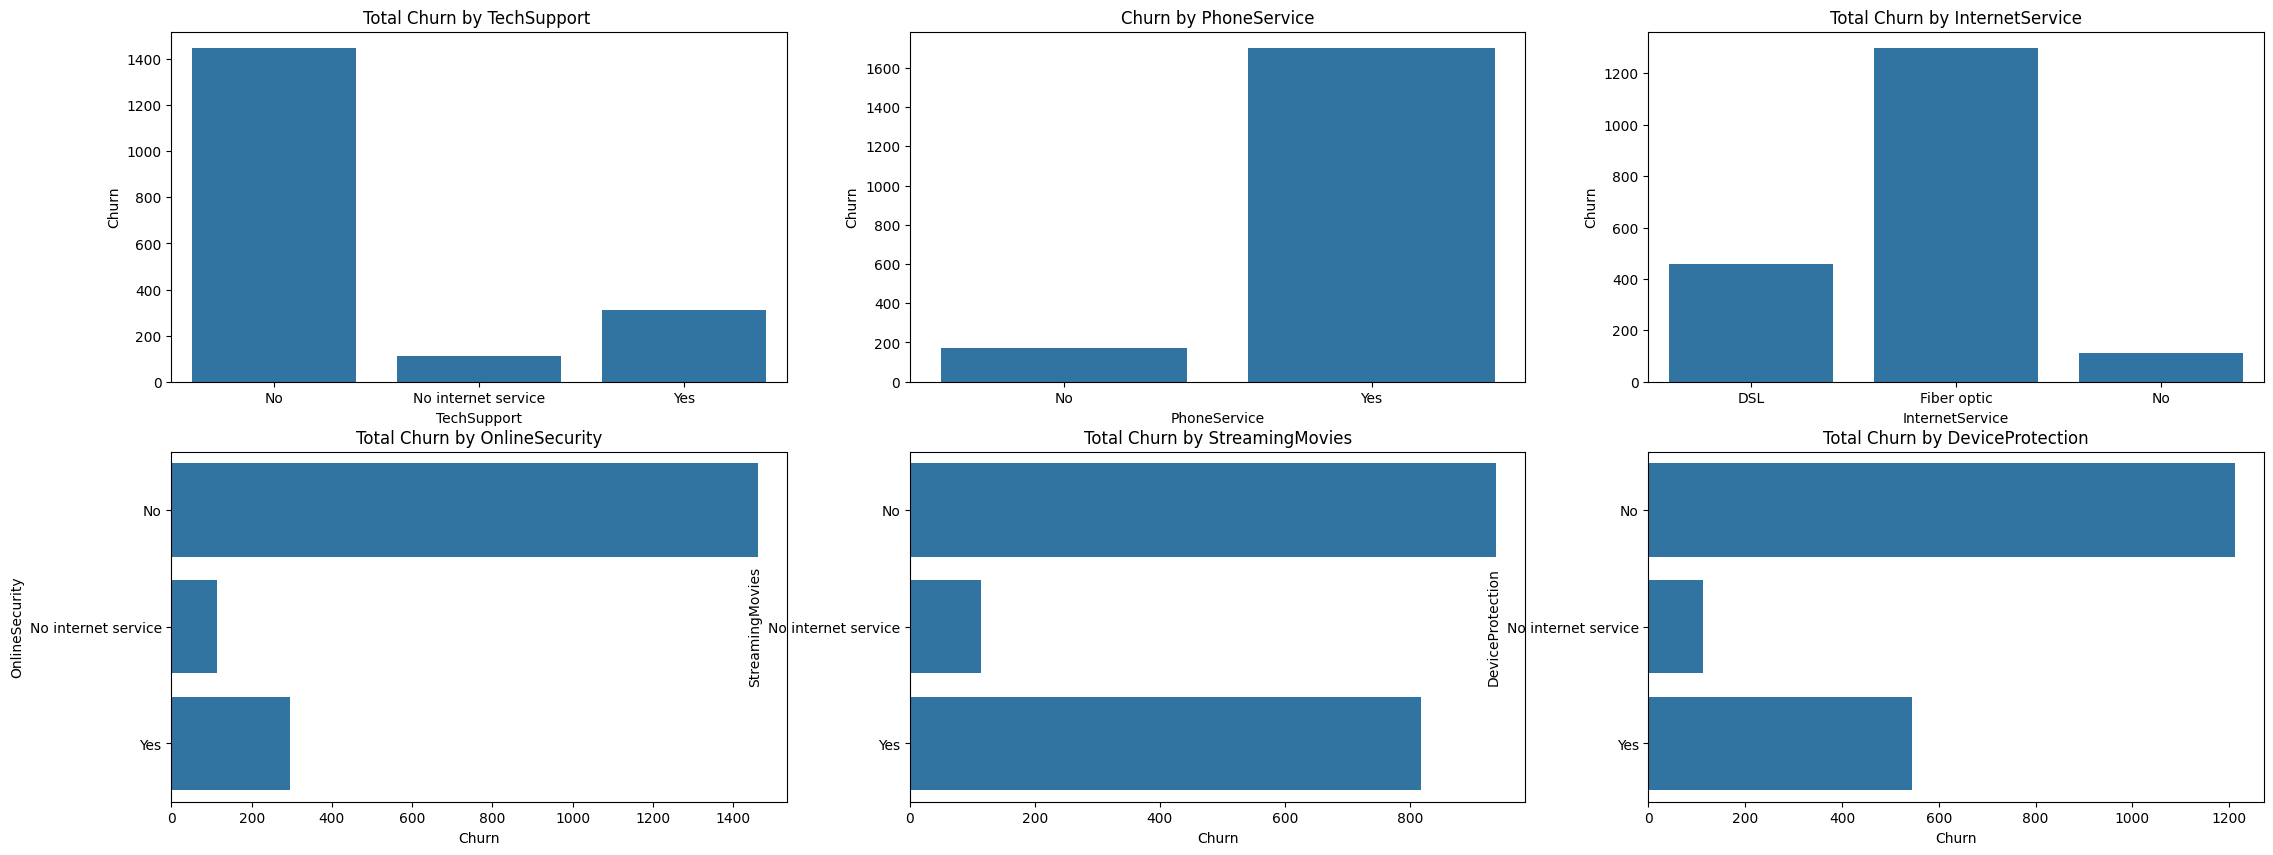

In [54]:
#MULTIVARIATE ANALYSIS OF CATEGORICAL COLUMNS

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

ts_churn = data.groupby("TechSupport")["Churn"].sum().reset_index()
sns.barplot (x='TechSupport',data=ts_churn, y='Churn', ax=axs[0,0])
axs[0,0].set_title("Total Churn by TechSupport ")

ps_churn = data.groupby("PhoneService")["Churn"].sum().reset_index()
sns.barplot (x='PhoneService',data=ps_churn, y='Churn', ax=axs[0,1])
axs[0,1].set_title("Churn by PhoneService")

is_churn = data.groupby("InternetService")["Churn"].sum().reset_index()
sns.barplot (x='InternetService',data=is_churn, y='Churn', ax=axs[0,2])
axs[0,2].set_title("Total Churn by InternetService")

os_churn = data.groupby("OnlineSecurity")["Churn"].sum().reset_index()
sns.barplot (y='OnlineSecurity',data=os_churn, x='Churn', ax=axs[1,0])
axs[1,0].set_title("Total Churn by OnlineSecurity")

sm_churn = data.groupby("StreamingMovies")["Churn"].sum().reset_index()
sns.barplot(y='StreamingMovies',data=sm_churn, x='Churn', ax=axs[1,1])
axs[1,1].set_title("Total Churn by StreamingMovies")

dp_churn = data.groupby("DeviceProtection")["Churn"].sum().reset_index()
sns.barplot (y='DeviceProtection',data=dp_churn, x='Churn', ax=axs[1,2])
axs[1,2].set_title("Total Churn by DeviceProtection");

In [55]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [56]:
#call_up all categorical columns
categorical_cols=data.select_dtypes(include=["object"])

In [57]:
categorical_cols

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6


In [58]:
#PERFORMING LABEL ENCODING FOR CATEGORICAL COLUMNS
#CONVERTING TEXT TO NUMBERS BY ENCODING

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#LABEL ENCODE ALL CATEGORICAL COLUMNS

for col in categorical_cols.columns:
    data[col]=le.fit_transform(data[col])


le.fit_transform(data['Partner'])

In [59]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [60]:
#Drop unnecessary columns(ID column)
data.drop(['customerID'], axis=1, inplace=True)


In [61]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [62]:
#HANDLING OUTLIERS
data['MonthlyCharges'].mean(), data['MonthlyCharges'].max()

(64.76169246059918, 118.75)

In [63]:
data['TotalCharges'].mean, data['TotalCharges'].max()

(<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       2505
 1       1466
 2        157
 3       1400
 4        925
         ... 
 7038    1597
 7039    5698
 7040    2994
 7041    2660
 7042    5407
 Name: TotalCharges, Length: 7043, dtype: int64>,
 6530)

In [64]:
data.mean()

gender                 0.504756
SeniorCitizen          0.162147
Partner                0.483033
Dependents             0.299588
tenure                32.371149
PhoneService           0.903166
MultipleLines          0.940508
InternetService        0.872923
OnlineSecurity         0.790004
OnlineBackup           0.906432
DeviceProtection       0.904444
TechSupport            0.797104
StreamingTV            0.985376
StreamingMovies        0.992475
Contract               0.690473
PaperlessBilling       0.592219
PaymentMethod          1.574329
MonthlyCharges        64.761692
TotalCharges        3257.794122
Churn                  0.265370
dtype: float64

#Deploring the StandardScalar Technique(Mean=0, Std=1)

In [65]:
#Split data into X and Y
x=data.drop(['Churn'], axis=1)
y=data['Churn']

In [66]:
x.mean().mean(), x.std().mean()

(177.22768108685742, 102.88402773650118)

In [67]:
#import Libraries
from sklearn.preprocessing import StandardScaler
#Create scaling object
scaler= StandardScaler()
#Scaling using fit_transform
x=scaler.fit_transform(x)

In [68]:
x.mean().mean(), x.std().mean()

(-5.3098091853807825e-20, 1.0)

In [69]:
#Standardized data columns
x.mean(), x.std()

(-5.3098091853807825e-20, 1.0)

In [70]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score,roc_curve,auc,confusion_matrix

In [71]:
#Seperate into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=37)

In [72]:
#fitting/training our Machine Learning Model
lm=LogisticRegression()
lm.fit(x_train, y_train)

LogisticRegression()

In [73]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
svc=SVC()
svc.fit(x_train, y_train)

SVC()

In [75]:
abc=AdaBoostClassifier()
abc.fit(x_train, y_train)

AdaBoostClassifier()

In [76]:
#evaluating: accuracy, f1_score
predictions_rfc=rfc.predict(x_test)
predictions_lm=lm.predict(x_test)
predictions_svc=svc.predict(x_test)
predictions_abc=abc.predict(x_test)

In [78]:
rfc_acc_score=accuracy_score(y_test, predictions_rfc)
lm_acc_score=accuracy_score(y_test, predictions_lm)
svc_acc_score=accuracy_score(y_test, predictions_svc)
abc_acc_score=accuracy_score(y_test, predictions_abc)

In [ ]:
print(f'Random Forest Accuracy Score: {100*rfc_acc_score}')


An accuracy of 78.71... from a Random Forest Model indicates that this Linear-Model correctly predicts the class of Customer Churn approximately 78.71% of the time on unseen dataset.

In [ ]:
print(f'Logistic Regression Accuracy Score: {100*lm_acc_score}')


An accuracy of 80.01... from a Logistic Regression Model indicates that this Linear-Model correctly predicts the class of Customer Churn approximately 80.01% of the time on unseen dataset.

In [ ]:
print(f'Support Vector Machine Accuracy Score: {100*svc_acc_score}')

An accuracy score of 78.53... from a Support Vector Classifier indicates that this particular SVC model correctly predicts the class of customer churn approximately 78.53% of the time on unseen dataset.

In [ ]:
print(f'AdaBoost Classifier Accuracy Score: {100*abc_acc_score}')

An accuracy of 80.01... from an Ada Boost Classifier Model indicates that this Support Vector Model correctly predicts the class of Customer Churn approximately 80.01% of the time on unseen dataset.

In [86]:
 precision_score(y_test, predictions_rfc)
 recall_score(y_test, predictions_rfc)
 f1_score(y_test, predictions_rfc)
 confusion_matrix(y_test, predictions_rfc)
 roc_auc_score(y_test, predictions_rfc)
 roc_curve(y_test, predictions_rfc)


 print(f'precision_score: {100*precision_score(y_test, predictions_rfc)}')
 print(f'recall_score: {100*recall_score(y_test, predictions_rfc)}')
 print(f'f1_score: {100*f1_score(y_test, predictions_rfc)}')
 print(f'confusion_matrix: {confusion_matrix(y_test, predictions_rfc)}')
 print(f'roc_auc_score: {100*roc_auc_score(y_test, predictions_rfc)}')
 print(f'roc_curve: {100*roc_curve(y_test, predictions_rfc)}')

precision_score: 64.46280991735537
recall_score: 47.17741935483871
f1_score: 54.48195576251456
confusion_matrix: [[1136  129]
 [ 262  234]]
roc_auc_score: 68.48989544817033
roc_curve: (array([0.        , 0.10197628, 1.        ]), array([0.        , 0.47177419, 1.        ]), array([2, 1, 0]), array([0.        , 0.10197628, 1.        ]), array([0.        , 0.47177419, 1.        ]), array([2, 1, 0]), array([0.        , 0.10197628, 1.        ]), array([0.        , 0.47177419, 1.        ]), array([2, 1, 0]), array([0.        , 0.10197628, 1.        ]), array([0.        , 0.47177419, 1.        ]), array([2, 1, 0]), array([0.        , 0.10197628, 1.        ]), array([0.        , 0.47177419, 1.        ]), array([2, 1, 0]), array([0.        , 0.10197628, 1.        ]), array([0.        , 0.47177419, 1.        ]), array([2, 1, 0]), array([0.        , 0.10197628, 1.        ]), array([0.        , 0.47177419, 1.        ]), array([2, 1, 0]), array([0.        , 0.10197628, 1.        ]), array([0.     

In [87]:
 precision_score(y_test, predictions_lm)
 recall_score(y_test, predictions_lm)
 f1_score(y_test, predictions_lm)
 confusion_matrix(y_test, predictions_lm)
 roc_auc_score(y_test, predictions_lm)
 roc_curve(y_test, predictions_lm)

 print(f'precision_score: {100*precision_score(y_test,predictions_lm)}')
 print(f'recall_score: {100*recall_score(y_test, predictions_lm)}')
 print(f'f1_score: {100*f1_score(y_test, predictions_lm)}')
 print(f'confusion_matrix: ',confusion_matrix(y_test, predictions_lm))
 print(f'roc_auc_score: {100*roc_auc_score(y_test, predictions_lm)}')
 print(f'roc_curve: {100*roc_curve(y_test, predictions_lm)}')

precision_score: 69.04761904761905
recall_score: 52.62096774193549
f1_score: 59.72540045766591
confusion_matrix:  [[1148  117]
 [ 235  261]]
roc_auc_score: 71.685977942114
roc_curve: (array([0.        , 0.09249012, 1.        ]), array([0.        , 0.52620968, 1.        ]), array([2, 1, 0]), array([0.        , 0.09249012, 1.        ]), array([0.        , 0.52620968, 1.        ]), array([2, 1, 0]), array([0.        , 0.09249012, 1.        ]), array([0.        , 0.52620968, 1.        ]), array([2, 1, 0]), array([0.        , 0.09249012, 1.        ]), array([0.        , 0.52620968, 1.        ]), array([2, 1, 0]), array([0.        , 0.09249012, 1.        ]), array([0.        , 0.52620968, 1.        ]), array([2, 1, 0]), array([0.        , 0.09249012, 1.        ]), array([0.        , 0.52620968, 1.        ]), array([2, 1, 0]), array([0.        , 0.09249012, 1.        ]), array([0.        , 0.52620968, 1.        ]), array([2, 1, 0]), array([0.        , 0.09249012, 1.        ]), array([0.      

In [88]:
 precision_score(y_test, predictions_svc)
 recall_score(y_test, predictions_svc)
 f1_score(y_test, predictions_svc)
 confusion_matrix(y_test, predictions_svc)
 roc_auc_score(y_test, predictions_svc)
 roc_curve(y_test, predictions_svc)

 print(f'precision_score: {100*precision_score(y_test,predictions_svc)}')
 print(f'recall_score: {100*recall_score(y_test,predictions_svc)}')
 print(f'f1_score: {100*f1_score(y_test, predictions_svc)}')
 print(f'confusion_matrix: ',confusion_matrix(y_test, predictions_svc))
 print(f'roc_auc_score: {100*roc_auc_score(y_test, predictions_svc)}')
 print(f'roc_curve: {100*roc_curve(y_test, predictions_svc)}')

precision_score: 68.4375
recall_score: 44.153225806451616
f1_score: 53.67647058823528
confusion_matrix:  [[1164  101]
 [ 277  219]]
roc_auc_score: 68.08451804156573
roc_curve: (array([0.       , 0.0798419, 1.       ]), array([0.        , 0.44153226, 1.        ]), array([2, 1, 0]), array([0.       , 0.0798419, 1.       ]), array([0.        , 0.44153226, 1.        ]), array([2, 1, 0]), array([0.       , 0.0798419, 1.       ]), array([0.        , 0.44153226, 1.        ]), array([2, 1, 0]), array([0.       , 0.0798419, 1.       ]), array([0.        , 0.44153226, 1.        ]), array([2, 1, 0]), array([0.       , 0.0798419, 1.       ]), array([0.        , 0.44153226, 1.        ]), array([2, 1, 0]), array([0.       , 0.0798419, 1.       ]), array([0.        , 0.44153226, 1.        ]), array([2, 1, 0]), array([0.       , 0.0798419, 1.       ]), array([0.        , 0.44153226, 1.        ]), array([2, 1, 0]), array([0.       , 0.0798419, 1.       ]), array([0.        , 0.44153226, 1.        ]), a

In [89]:
 precision_score(y_test, predictions_abc)
 recall_score(y_test, predictions_abc)
 f1_score(y_test, predictions_abc)
 confusion_matrix(y_test, predictions_abc)
 roc_auc_score(y_test, predictions_abc)
 roc_curve(y_test, predictions_abc)

 print(f'precision_score: {100*precision_score(y_test,predictions_abc)}')
 print(f'recall_score: {100*recall_score(y_test,predictions_abc)}')
 print(f'f1_score: {100*f1_score(y_test, predictions_abc)}')
 print(f'confusion_matrix: ',confusion_matrix(y_test, predictions_abc))
 print(f'roc_auc_score: {100*roc_auc_score(y_test, predictions_abc)}')
 print(f'roc_curve: {100*roc_curve(y_test, predictions_abc)}')

precision_score: 69.67213114754098
recall_score: 51.41129032258065
f1_score: 59.164733178654295
confusion_matrix:  [[1154  111]
 [ 241  255]]
roc_auc_score: 71.3182933826342
roc_curve: (array([0.        , 0.08774704, 1.        ]), array([0.       , 0.5141129, 1.       ]), array([2, 1, 0]), array([0.        , 0.08774704, 1.        ]), array([0.       , 0.5141129, 1.       ]), array([2, 1, 0]), array([0.        , 0.08774704, 1.        ]), array([0.       , 0.5141129, 1.       ]), array([2, 1, 0]), array([0.        , 0.08774704, 1.        ]), array([0.       , 0.5141129, 1.       ]), array([2, 1, 0]), array([0.        , 0.08774704, 1.        ]), array([0.       , 0.5141129, 1.       ]), array([2, 1, 0]), array([0.        , 0.08774704, 1.        ]), array([0.       , 0.5141129, 1.       ]), array([2, 1, 0]), array([0.        , 0.08774704, 1.        ]), array([0.       , 0.5141129, 1.       ]), array([2, 1, 0]), array([0.        , 0.08774704, 1.        ]), array([0.       , 0.5141129, 1.   

In [95]:
y_test.value_counts()

Churn
0    1265
1     496
Name: count, dtype: int64

In [90]:
#Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {100*roc_auc}')
print(f'thresholds: {thresholds}')


ROC AUC: 68.48989544817033
thresholds: [2 1 0]


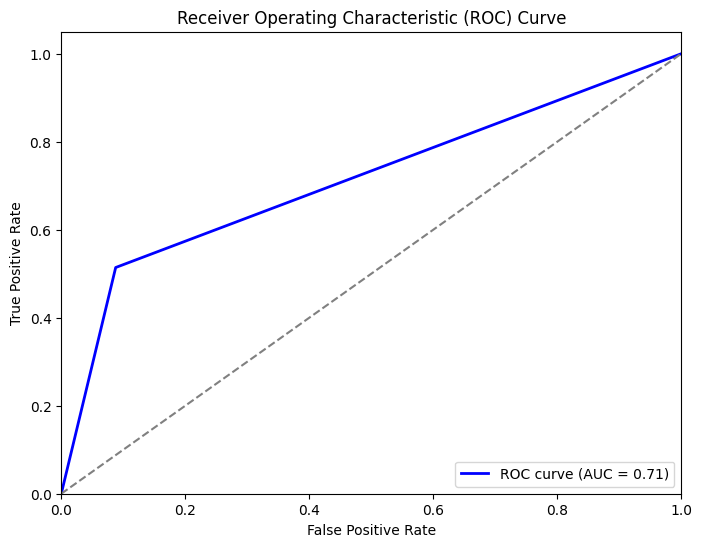

In [96]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_lm)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {100*roc_auc}')
print(f'thresholds: {thresholds}')

ROC AUC: 71.685977942114
thresholds: [2 1 0]


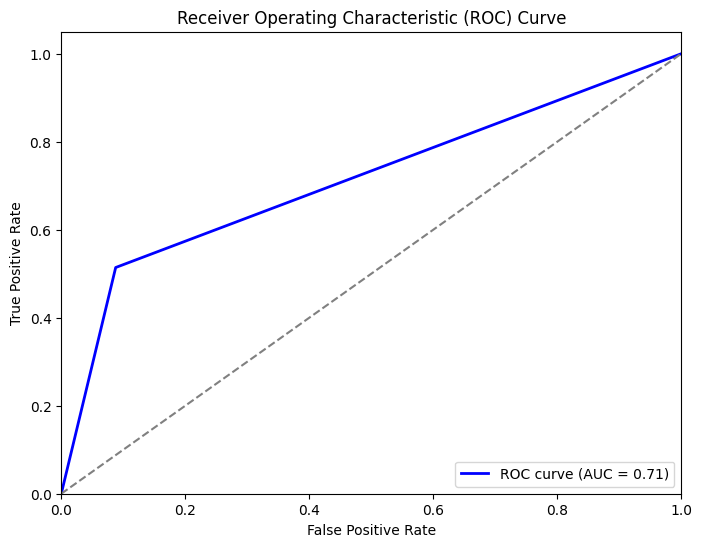

In [97]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_svc)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {100*roc_auc}')
print(f'thresholds: {thresholds}')

ROC AUC: 68.08451804156573
thresholds: [2 1 0]


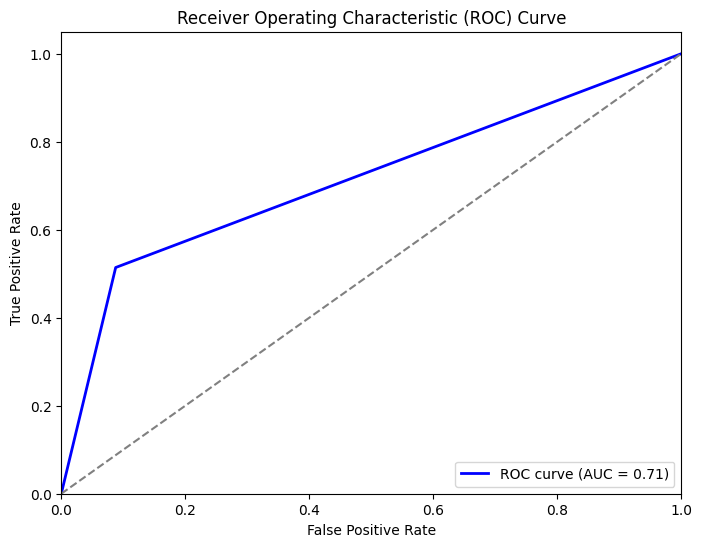

In [98]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_abc)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {100*roc_auc}')
print(f'thresholds: {thresholds}')


ROC AUC: 71.3182933826342
thresholds: [2 1 0]


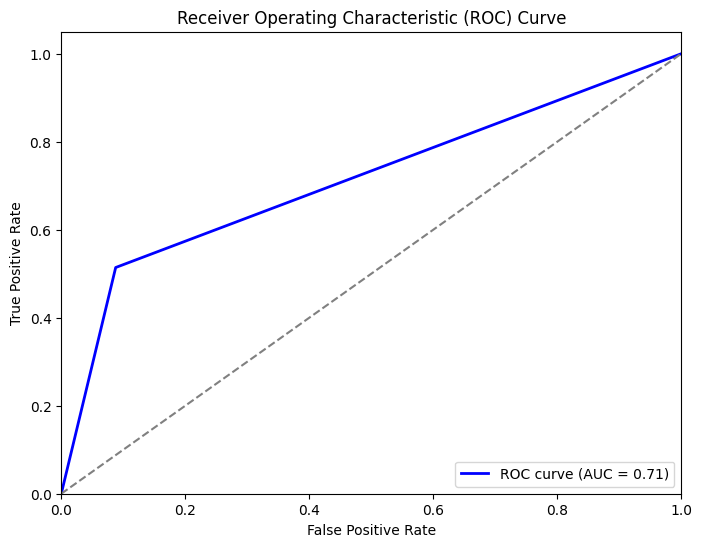

In [100]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()